In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''In this run, filters = 50, lr = 1e-4, drop-out = 0.1, optimization = ADAM, batch size = 6, epoch number of 30 and x_train.shape[0]/batch_size steps each'''

'In this run, filters = 50, lr = 1e-4, drop-out = 0.1, optimization = ADAM, batch size = 6, epoch number of 30 and x_train.shape[0]/batch_size steps each'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image

## Load data

In [ ]:
images = glob.glob("/content/drive/MyDrive/mini_project/project_segmentation/final_datas/finalImages/*.png")
msks = glob.glob("/content/drive/MyDrive/mini_project/project_segmentation/final_datas/finalMasks/*.png")


In [ ]:
print(len(msks))
print(len(images))

670
670


In [ ]:
print(msks[30])
print(images[30])

/content/drive/MyDrive/mini_project/project_segmentation/final_datas/finalMasks/mask1.png
/content/drive/MyDrive/mini_project/project_segmentation/final_datas/finalImages/image31.png


In [ ]:
print(msks[31])
print(images[31])

/content/drive/MyDrive/mini_project/project_segmentation/final_datas/finalMasks/mask32.png
/content/drive/MyDrive/mini_project/project_segmentation/final_datas/finalImages/image32.png


In [ ]:
#lets filter our data from 31 as there is problem at 30
orgs = images[31:]
masks = msks[31:]

In [ ]:
#abother try of loading
imgs_list = []
masks_list = []
for image, mask in zip(orgs, masks):
    imgs_list.append(np.array(Image.open(image).resize((256,256))))

    im = Image.open(mask).resize((256,256))
    masks_list.append(np.array(im))

imgs_np = np.asarray(imgs_list)
masks_np = np.asarray(masks_list)

In [ ]:
print(imgs_np.shape, masks_np.shape)

(639, 256, 256) (639, 256, 256)


## Plot images + masks + overlay (mask over original)

In [ ]:
!pip install keras_unet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


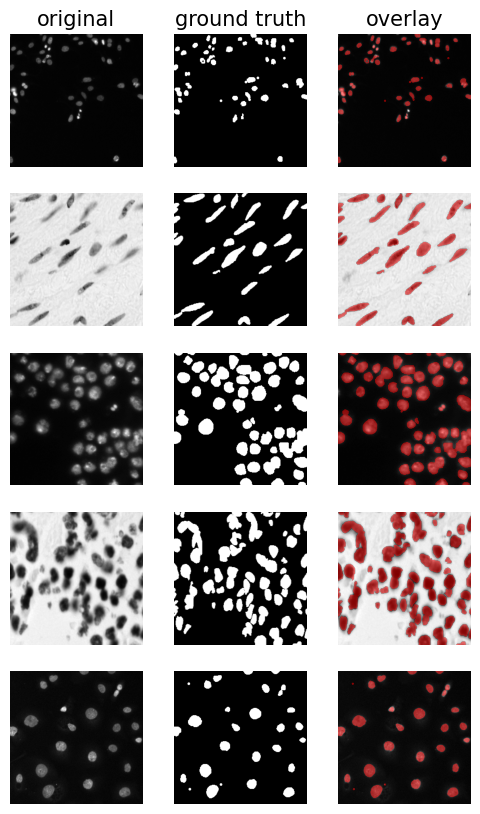

In [ ]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=imgs_np, mask_imgs=masks_np, nm_img_to_plot=5, figsize=2)


## Get data into correct shape, dtype and range (0.0-1.0)

In [ ]:
print(imgs_np.max(), masks_np.max())

255 255


In [ ]:
x = np.asarray(imgs_np, dtype=np.float32)/255
y = np.asarray(masks_np, dtype=np.float32)/255

In [ ]:
print(x.max(), y.max())

1.0 1.0


In [ ]:
print(x.shape, y.shape)

(639, 256, 256) (639, 256, 256)


In [ ]:
y = y.reshape(y.shape[0], y.shape[1], y.shape[2], 1)
print(x.shape, y.shape)

(639, 256, 256) (639, 256, 256, 1)


In [ ]:
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
print(x.shape, y.shape)

(639, 256, 256, 1) (639, 256, 256, 1)


##  Train/val split

In [ ]:
from sklearn.model_selection import train_test_split

#x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, random_state=0)
x_train, images_test, y_train, masks_test = train_test_split(x, y, test_size=0.3, random_state=42)
'''
testing the result of testsize = 0.2 and testval of 0.2 with batch size of 8
'''
# Then, split the combined validation/test sets into separate validation and test sets
images_val, images_test, masks_val, masks_test = train_test_split(images_test, masks_test, test_size=0.2, random_state=42)

# Now, you have images_train, masks_train for training,
# images_val, masks_val for validation, and images_test, masks_test for testing

# Print the sizes of the resulting sets
print("Train set size:", x_train.shape)
print("Validation set size:", images_val.shape)
print("Test set size:", images_test.shape)

Train set size: (447, 256, 256, 1)
Validation set size: (153, 256, 256, 1)
Test set size: (39, 256, 256, 1)


## Prepare train generator with data augmentation

In [ ]:
#Perform augmentation
from keras_unet.utils import get_augmented

train_gen = get_augmented(
    x_train, y_train, batch_size=6,
    data_gen_args = dict(
        rotation_range=15.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=50,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant'
    ))

(6, 256, 256, 1) (6, 256, 256, 1)


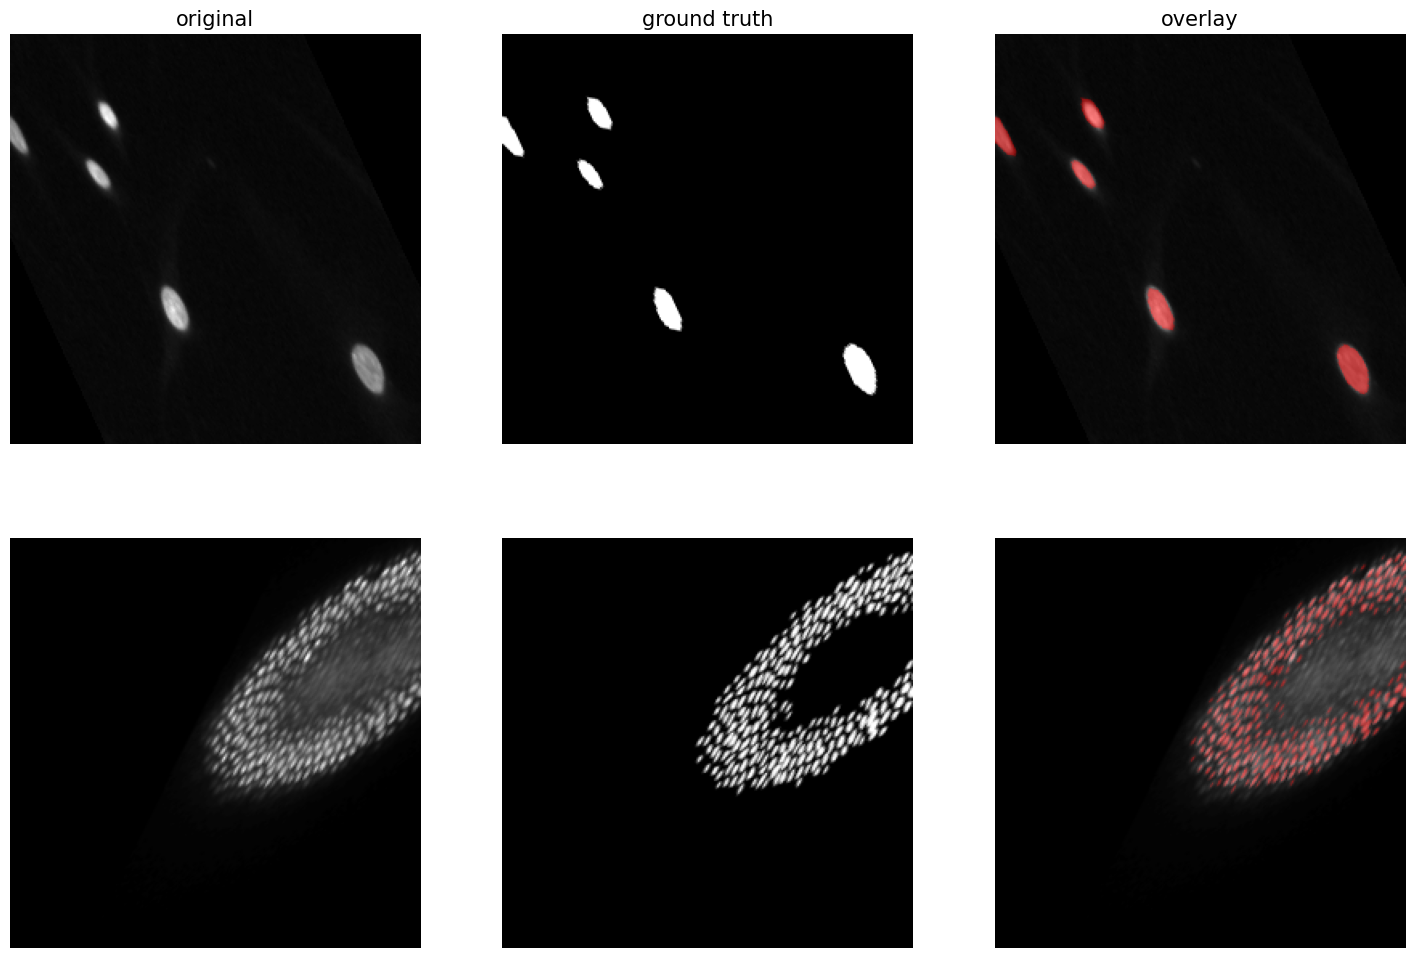

In [ ]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

## Initialize network

In [ ]:
from keras_unet.models import custom_unet

input_shape = x_train[0].shape

model = custom_unet(
    input_shape,
    use_batch_norm=False,
    num_classes=1,
    filters=50,
    dropout=0.1,
    output_activation='sigmoid'
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 50  500         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 spatial_dropout2d (SpatialDrop  (None, 256, 256, 50  0          ['conv2d[0][0]']                 
 out2D)                         )                                                             

In [ ]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin\\"

In [ ]:
import sys
print(sys.path)

sys.path.append("C:\\Program Files (x86)\\Graphviz2.38\\bin\\")

print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\']


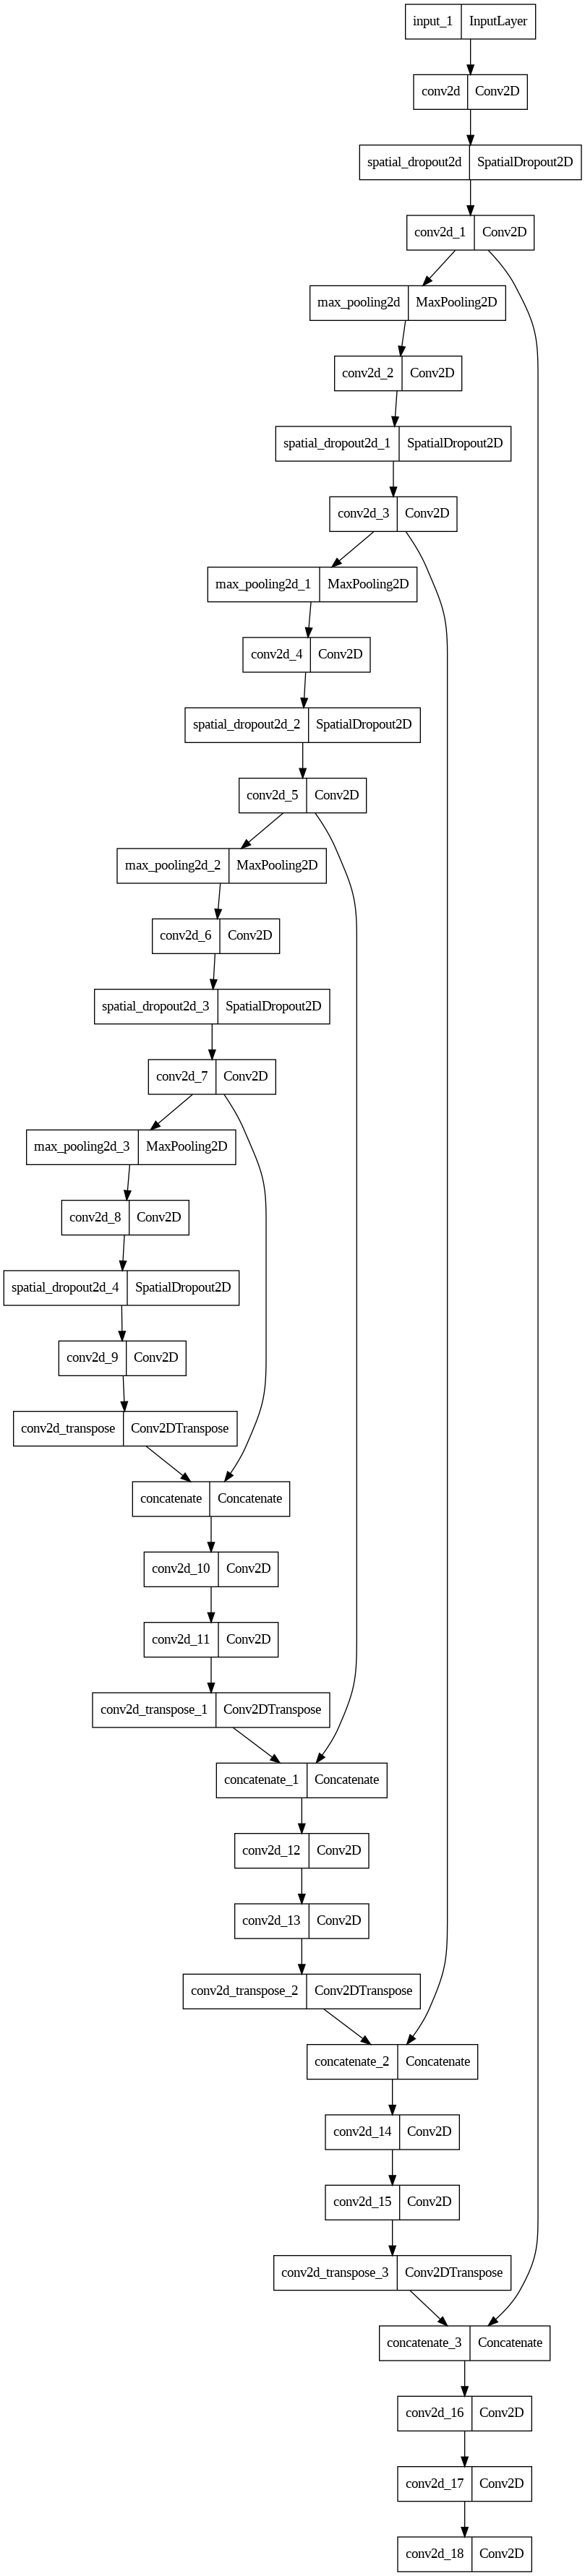

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

## Compile + train

In [ ]:
from keras.callbacks import ModelCheckpoint

model_filepath = '/content/drive/MyDrive/mini_project/project_segmentation/final_datas/segm_model_try6.h5'
callback_checkpoint = ModelCheckpoint(
    model_filepath,
    verbose=1,
    monitor='val_loss',
    save_best_only=True,
)

In [ ]:
from keras.optimizers import Adam, SGD
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance
from tensorflow.keras import callbacks

model.compile(
    optimizer=Adam(lr = 1e-4),
    loss='binary_crossentropy',
    metrics=[iou, iou_thresholded]
)


In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit_generator(
    train_gen,
    steps_per_epoch= x_train.shape[0]/6,
    epochs=100,
    validation_data=(images_val, masks_val),
    callbacks=[early_stopping]
)

Epoch 1/100


<ipython-input-33-0fb7750e263c>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


74/74 [==============================] - 90s 973ms/step - loss: 0.5169 - iou: 0.0898 - iou_thresholded: 0.0137 - val_loss: 0.3861 - val_iou: 0.1625 - val_iou_thresholded: 5.7898e-05
Epoch 2/100
74/74 [==============================] - 26s 355ms/step - loss: 0.2505 - iou: 0.1871 - iou_thresholded: 1.4813e-04 - val_loss: 0.2590 - val_iou: 0.2333 - val_iou_thresholded: 2.8034e-04
Epoch 3/100
74/74 [==============================] - 27s 361ms/step - loss: 0.2083 - iou: 0.2375 - iou_thresholded: 0.0447 - val_loss: 0.2593 - val_iou: 0.2459 - val_iou_thresholded: 0.0499
Epoch 4/100
74/74 [==============================] - 26s 356ms/step - loss: 0.1885 - iou: 0.2929 - iou_thresholded: 0.2898 - val_loss: 0.2096 - val_iou: 0.3327 - val_iou_thresholded: 0.4505
Epoch 5/100
74/74 [==============================] - 25s 342ms/step - loss: 0.1588 - iou: 0.3635 - iou_thresholded: 0.5070 - val_loss: 0.1667 - val_iou: 0.4302 - val_iou_thresholded: 0.5876
Epoch 6/100
74/74 [==============================]

## Plot training history

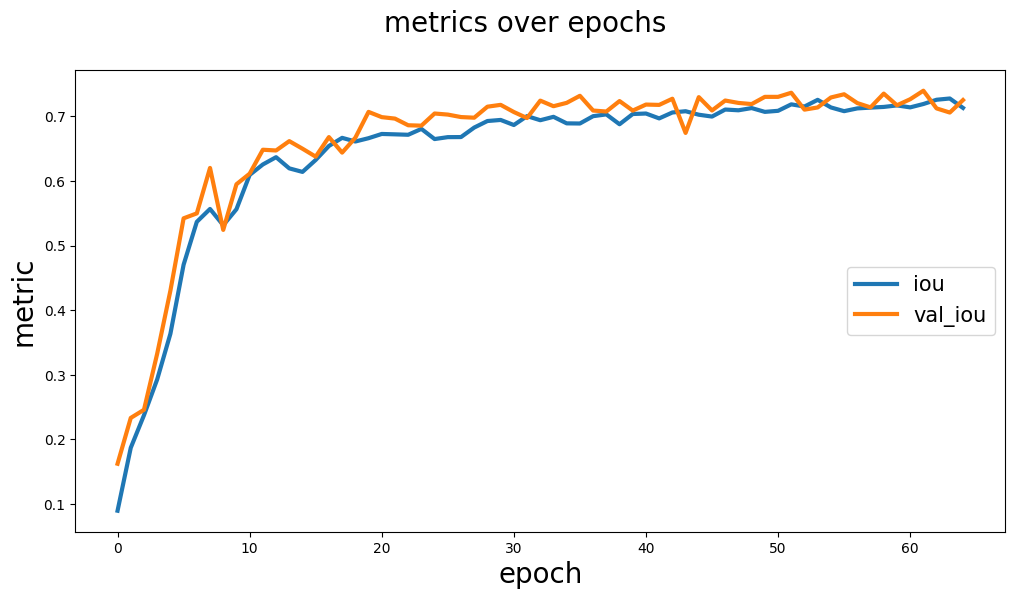

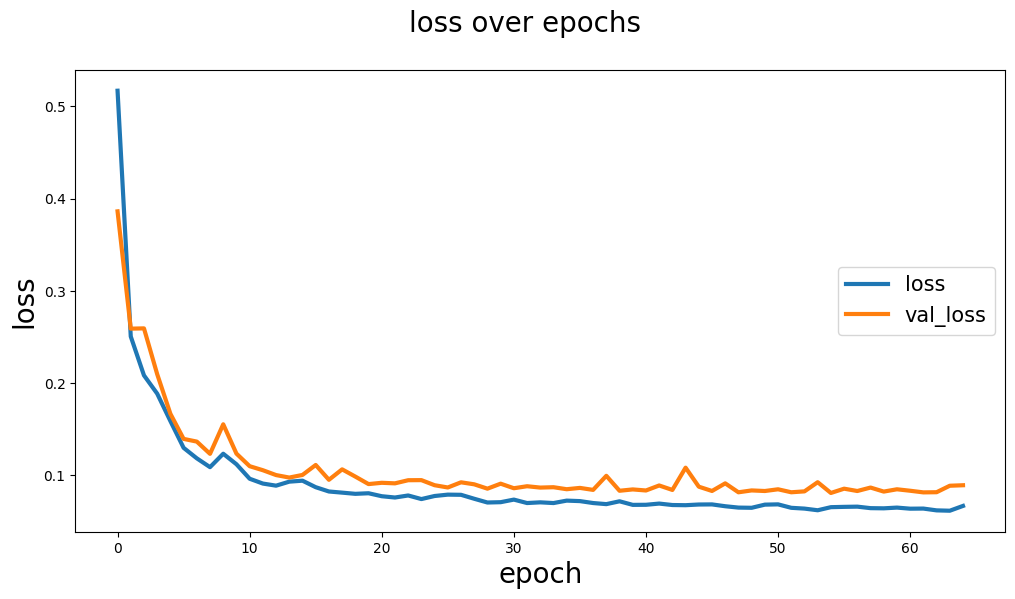

In [ ]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

## Plot original + ground truth + pred + overlay (pred on top of original)

In [ ]:
model_filepath = "/content/drive/MyDrive/mini_project/project_segmentation/final_datas/segm_model_try6.h5"  #change the path to use the result of other models
model.load_weights()
y_pred = model.predict(images_test)

2/2 [==============================] - 5s 4s/step


In [ ]:
print(len(y_pred))

39


In [ ]:
print(len(masks_test))

39


In [ ]:

# Evaluate the model on the test set
loss = model.evaluate(images_test, masks_test)

print("Test Loss:", loss)


2/2 [==============================] - 0s 101ms/step - loss: 0.0598 - iou: 0.7926 - iou_thresholded: 0.8624
Test Loss: [0.05976298451423645, 0.7926419973373413, 0.8623685836791992]


In [ ]:
#in this code, we brighten up the color to max if the brightness is more than 100 and vice versa if less than 100.
len(y_pred)
b = np.where(y_pred*255 > 100, 255, 0)  #

In [ ]:
#this code calculates the average iou for the test set
import numpy as np
y_true = masks_test
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

iou_scores = []
for i in range(len(b)):
    y_pre = b[i]
    y_tru = y_true[i]
    iou_score = calculate_iou(y_tru, y_pre)
    iou_scores.append(iou_score)

# Print the average IoU score
avg_iou = np.mean(iou_scores)
print("Average IoU:", avg_iou)


Average IoU: 0.822624361956303


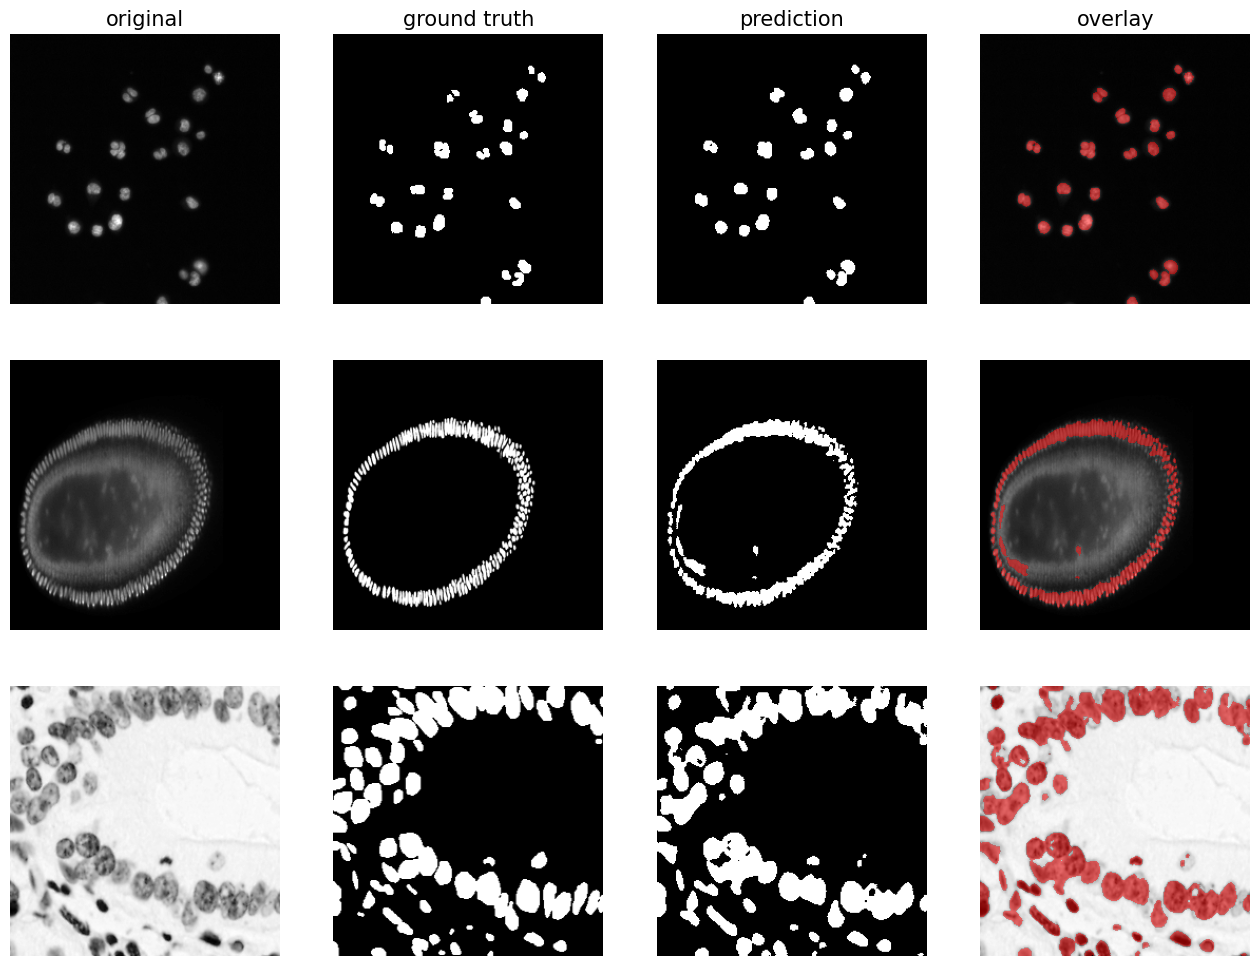

In [ ]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=images_test, mask_imgs=masks_test, pred_imgs=b, nm_img_to_plot=3)